<a href="https://colab.research.google.com/github/yoursenpai69/basic-nn-model-177/blob/main/Copy_of_NNTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Authenticate User

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

## Open the Google sheet and convert into DataFrame

In [39]:
data = pd.read_csv("basic_data.csv")

df = pd.DataFrame(data = data)
df.head()

,input,output
0,1,15
1,5,55
2,10,105
3,3,25
4,22,225


In [40]:
df.head(20)

,input,output
0,1,15
1,5,55
2,10,105
3,3,25
4,22,225
5,34,345
6,20,205
7,12,125
8,14,145
9,18,185


In [42]:
X = df[["input"]].values
Y = df[["output"]].values
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=20)

In [43]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)
Scaler.fit(X_test)

MinMaxScaler()

In [44]:
final_train_x = Scaler.transform(X_train)
final_test_x = Scaler.transform(X_test)



In [47]:
model = Sequential([
    Dense(10,activation='relu'),
    Dense(15,activation='relu'),
    Dense(1)
])

In [48]:
model.compile(optimizer='rmsprop',loss='mse')
model.fit(final_train_x,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 15ms/step - loss: 58004.2695
Epoch 2502/5000
1/1 [==============================] - 0s 12ms/step - loss: 57905.5000
Epoch 2503/5000
1/1 [==============================] - 0s 12ms/step - loss: 57806.0000
Epoch 2504/5000
1/1 [==============================] - 0s 14ms/step - loss: 57706.4375
Epoch 2505/5000
1/1 [==============================] - 0s 10ms/step - loss: 57608.5938
Epoch 2506/5000
1/1 [==============================] - 0s 9ms/step - loss: 57509.7695
Epoch 2507/5000
1/1 [==============================] - 0s 7ms/step - loss: 57410.1719
Epoch 2508/5000
1/1 [==============================] - 0s 12ms/step - loss: 57310.5430
Epoch 2509/5000
1/1 [==============================] - 0s 8ms/step - loss: 57212.6094
Epoch 2510/5000
1/1 [==============================] - 0s 7ms/step - loss: 57113.7188
Epoch 2511/5000
1/1 [==============================] - 0s 8ms/step - loss: 57014.0469
Epoch 2512/50

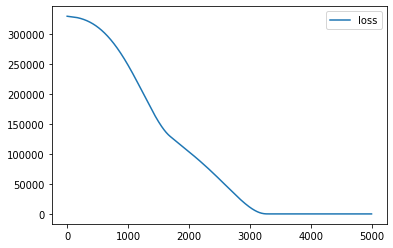

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [50]:
model.evaluate(final_test_x,y_test)

1/1 [==============================] - 0s 309ms/step - loss: 4.4677


4.4676513671875

In [53]:
pred1 = [[100]]
pred_trans = Scaler.transform(pred1)

In [52]:
model.predict(pred_trans)

array([[1005.7482]], dtype=float32)